In [1]:
!curl -L "https://app.roboflow.com/ds/OR5oZA7iln?key=eYEV7o2oHF" > roboflow.zip
!unzip roboflow.zip 
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   3048      0 --:--:-- --:--:-- --:--:--  3054
100 42.7M  100 42.7M    0     0  13.4M      0  0:00:03  0:00:03 --:--:-- 16.0M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/10_png.rf.1264ddabba6f3328eded41b1598240e9.jpg  
 extracting: train/images/10_png.rf.3801bcccfaa98c2f3bb51bfe8f87ddf9.jpg  
 extracting: train/images/10_png.rf.3ffb05065057d776b6b58d10af382744.jpg  
 extracting: train/images/10_png.rf.79f082a42f152052f1edb5ee4bbc25bf.jpg  
 extracting: train/images/10_png.rf.8763a874e501863682f69b34fe43a595.jpg  
 extracting: train/images/10_png.rf.8dd6e3305989123595557a20dbe47020.jpg  
 extracting: train/images/10_png.rf.a2062290a28b9b

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:01m0:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [5]:
from ultralytics import YOLO
model=YOLO("yolov8m-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 52.4M/52.4M [00:00<00:00, 84.4MB/s]


In [6]:
%%writefile /kaggle/working/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['Buildings']

roboflow:
  workspace: encroachment
  project: encroachment-dwic8
  version: 24
  license: CC BY 4.0
  url: https://universe.roboflow.com/encroachment/encroachment-dwic8/dataset/24

Overwriting /kaggle/working/data.yaml


In [7]:
import os
import random
import shutil
from pathlib import Path

# Paths
train_images_dir = "/kaggle/working/train/images"
train_labels_dir = "/kaggle/working/train/labels"
val_images_dir = "/kaggle/working/valid/images"
val_labels_dir = "/kaggle/working/valid/labels"

# Create validation folders if not exist
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get all image files from the train/images directory
image_files = [f for f in os.listdir(train_images_dir) if os.path.isfile(os.path.join(train_images_dir, f))]
random.shuffle(image_files)  # Shuffle for unbiased splitting

# Split data: 80% train, 20% val
split_idx = int(0.8 * len(image_files))
val_images = image_files[split_idx:]  # Validation images (last 20%)

# Move images and corresponding labels to validation folder
for img in val_images:
    # Move the image
    src_image_path = os.path.join(train_images_dir, img)
    dest_image_path = os.path.join(val_images_dir, img)
    shutil.move(src_image_path, dest_image_path)

    # Move the corresponding label (if exists)
    label_file = Path(train_labels_dir) / (Path(img).stem + ".txt")
    if label_file.exists():
        dest_label_path = os.path.join(val_labels_dir, label_file.name)
        shutil.move(label_file, dest_label_path)

print("Dataset splitting into train/valid directories is complete!")


Dataset splitting into train/valid directories is complete!


In [47]:
result=model.train(
    data= "/kaggle/working/data.yaml",
    project= "output_model",
    name="epoc",
    epochs=400,
    batch=8,
    imgsz=512,
    
)

train: Scanning /kaggle/working/train/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
val: Scanning /kaggle/working/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]
      1/400      5.26G        1.6      1.614      1.438      1.565        100        512: 100%|██████████| 33/33 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]
      2/400      6.22G      1.049      1.296     0.9005      1.295         94        512: 100%|██████████| 33/33 [00:10<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]
      3/400      6.22G     0.9699      1.245     0.8102      1.211        120        512: 100%|██████

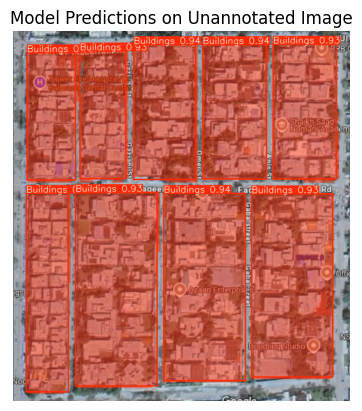

Predictions:
Label: 0.0, Confidence: 0.9428, Coordinates: [423.1913757324219, 30.524507522583008, 565.1295776367188, 330.0251770019531]
Label: 0.0, Confidence: 0.9378, Coordinates: [336.8338928222656, 362.2126770019531, 518.0375366210938, 780.8101196289062]
Label: 0.0, Confidence: 0.9370, Coordinates: [269.1259460449219, 30.930559158325195, 407.6557312011719, 331.0648193359375]
Label: 0.0, Confidence: 0.9316, Coordinates: [580.8922729492188, 29.29630470275879, 721.327392578125, 330.9655456542969]
Label: 0.0, Confidence: 0.9292, Coordinates: [139.3241729736328, 360.09918212890625, 321.22344970703125, 792.35595703125]
Label: 0.0, Confidence: 0.9291, Coordinates: [149.54580688476562, 44.09816360473633, 251.6728973388672, 329.3328552246094]
Label: 0.0, Confidence: 0.9285, Coordinates: [532.6619262695312, 363.4540100097656, 713.2919921875, 772.1343383789062]
Label: 0.0, Confidence: 0.9247, Coordinates: [31.422130584716797, 48.61609649658203, 139.12982177734375, 332.5538635253906]
Label: 0.0

In [48]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Path to the unannotated sample image
sample_image_path = "/kaggle/input/sampless/1_png.rf.1ec52e517ea1d901196db41f52a5ba2e.jpg"  # Update with the image you want to test

# Perform inference
results = model(sample_image_path)

# Access the first result in the list (the image you passed for testing)
result = results[0]

# Annotate the image with predictions
annotated_image_np = result.plot()  # Get the annotated image as a NumPy array

# Convert NumPy array to a PIL image
annotated_image = Image.fromarray(np.uint8(annotated_image_np))

# Save the annotated image to a file
output_dir = "/kaggle/working/inference_results"
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists
annotated_image_path = os.path.join(output_dir, "annotated_image.jpg")
annotated_image.save(annotated_image_path)

# Display the annotated image
plt.imshow(annotated_image)
plt.axis("off")
plt.title("Model Predictions on Unannotated Image")
plt.show()

# Print the predictions (bounding boxes, labels, confidence scores)
print("Predictions:")
for i in range(len(result.boxes)):
    # Access the class, confidence, and coordinates
    label = result.boxes.cls[i].item()  # Get the class index (e.g., 'Buildings')
    confidence = result.boxes.conf[i].item()  # Confidence score
    coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
    
    print(f"Label: {label}, Confidence: {confidence:.4f}, Coordinates: {coordinates}")


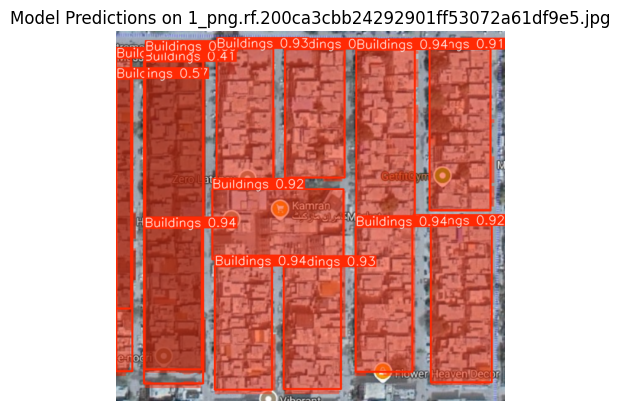

Predictions for 1_png.rf.200ca3cbb24292901ff53072a61df9e5.jpg:
Label: 0.0, Confidence: 0.9425, Coordinates: [160.69229125976562, 382.1478576660156, 253.36029052734375, 583.4630126953125]
Label: 0.0, Confidence: 0.9383, Coordinates: [389.8805847167969, 318.6849060058594, 481.74041748046875, 554.2861938476562]
Label: 0.0, Confidence: 0.9368, Coordinates: [46.34266662597656, 320.4984130859375, 139.90509033203125, 550.696533203125]
Label: 0.0, Confidence: 0.9367, Coordinates: [390.3513488769531, 30.034399032592773, 485.2686462402344, 301.9808044433594]
Label: 0.0, Confidence: 0.9333, Coordinates: [272.9331359863281, 383.27532958984375, 365.64581298828125, 582.8320922851562]
Label: 0.0, Confidence: 0.9287, Coordinates: [163.82135009765625, 28.927330017089844, 255.11692810058594, 240.03179931640625]
Label: 0.0, Confidence: 0.9251, Coordinates: [274.2979431152344, 29.078857421875, 371.2188415527344, 238.93402099609375]
Label: 0.0, Confidence: 0.9179, Coordinates: [156.5570068359375, 257.45993

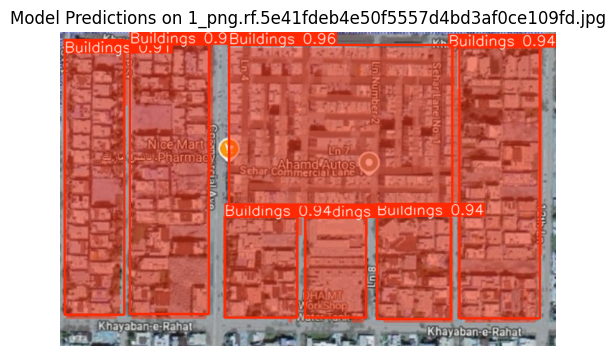

Predictions for 1_png.rf.5e41fdeb4e50f5557d4bd3af0ce109fd.jpg:
Label: 0.0, Confidence: 0.9616, Coordinates: [235.82952880859375, 19.379465103149414, 546.8589477539062, 241.3309783935547]
Label: 0.0, Confidence: 0.9398, Coordinates: [441.18157958984375, 257.9703369140625, 544.9854125976562, 400.374755859375]
Label: 0.0, Confidence: 0.9383, Coordinates: [556.0310668945312, 22.421192169189453, 668.05126953125, 399.307861328125]
Label: 0.0, Confidence: 0.9355, Coordinates: [229.57887268066406, 258.612060546875, 330.0584716796875, 398.7013244628906]
Label: 0.0, Confidence: 0.9287, Coordinates: [341.603515625, 259.1701354980469, 426.4914245605469, 398.0245361328125]
Label: 0.0, Confidence: 0.9254, Coordinates: [97.55470275878906, 18.81800651550293, 207.3074188232422, 393.3714294433594]
Label: 0.0, Confidence: 0.9104, Coordinates: [6.737536430358887, 12.200274467468262, 89.10701751708984, 394.7745666503906]


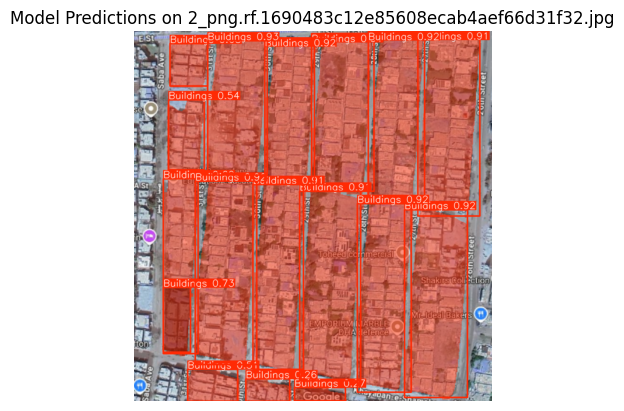

Predictions for 2_png.rf.1690483c12e85608ecab4aef66d31f32.jpg:
Label: 0.0, Confidence: 0.9338, Coordinates: [154.7780303955078, 20.83235740661621, 279.6005554199219, 302.1941223144531]
Label: 0.0, Confidence: 0.9241, Coordinates: [468.5653991699219, 362.3395690917969, 581.6066284179688, 758.6748657226562]
Label: 0.0, Confidence: 0.9203, Coordinates: [491.66632080078125, 1.5942258834838867, 609.8450317382812, 356.6899108886719]
Label: 0.0, Confidence: 0.9188, Coordinates: [274.25347900390625, 14.492435455322266, 378.7208557128906, 322.881591796875]
Label: 0.0, Confidence: 0.9178, Coordinates: [567.3994140625, 375.17169189453125, 699.467041015625, 769.399169921875]
Label: 0.0, Confidence: 0.9152, Coordinates: [128.42202758789062, 315.7087707519531, 257.2398986816406, 700.1589965820312]
Label: 0.0, Confidence: 0.9137, Coordinates: [249.23451232910156, 322.3140869140625, 355.3963928222656, 710.752197265625]
Label: 0.0, Confidence: 0.9100, Coordinates: [595.022216796875, 0.8799086213111877,

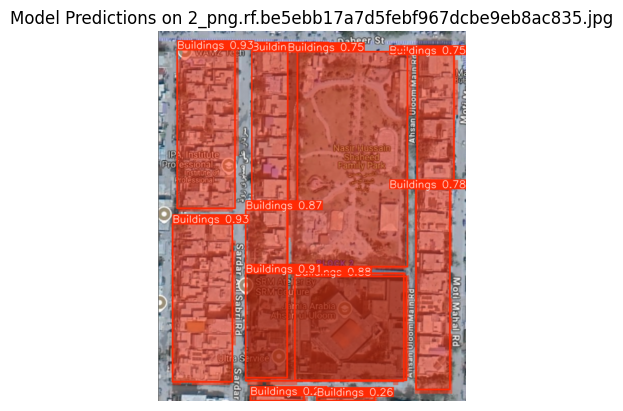

Predictions for 2_png.rf.be5ebb17a7d5febf967dcbe9eb8ac835.jpg:
Label: 0.0, Confidence: 0.9340, Coordinates: [28.249557495117188, 376.966796875, 145.5393524169922, 685.0994262695312]
Label: 0.0, Confidence: 0.9293, Coordinates: [37.88836669921875, 36.18034744262695, 150.9538116455078, 346.64471435546875]
Label: 0.0, Confidence: 0.9075, Coordinates: [171.98257446289062, 473.636474609375, 480.9848937988281, 683.7431030273438]
Label: 0.0, Confidence: 0.8815, Coordinates: [267.1866760253906, 479.6278076171875, 485.2485046386719, 682.0443725585938]
Label: 0.0, Confidence: 0.8710, Coordinates: [171.34823608398438, 349.4967956542969, 252.28057861328125, 677.386962890625]
Label: 0.0, Confidence: 0.7825, Coordinates: [504.0453186035156, 308.28631591796875, 570.7700805664062, 700.8785400390625]
Label: 0.0, Confidence: 0.7513, Coordinates: [253.2468719482422, 40.97646713256836, 487.5169677734375, 460.34881591796875]
Label: 0.0, Confidence: 0.7468, Coordinates: [506.50262451171875, 46.0347518920898

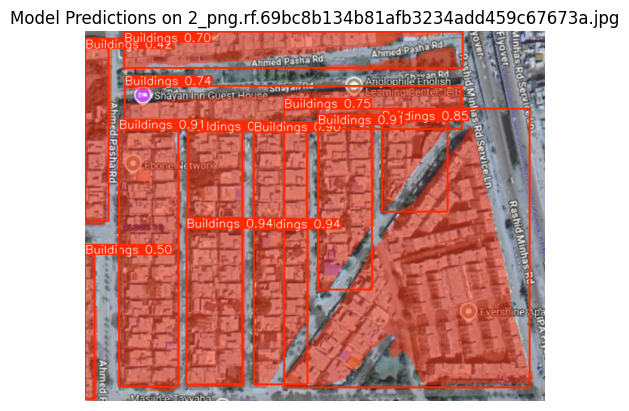

Predictions for 2_png.rf.69bc8b134b81afb3234add459c67673a.jpg:
Label: 0.0, Confidence: 0.9439, Coordinates: [174.62203979492188, 339.881103515625, 270.0669860839844, 607.8535766601562]
Label: 0.0, Confidence: 0.9416, Coordinates: [290.858642578125, 340.5208435058594, 382.0406188964844, 607.3643798828125]
Label: 0.0, Confidence: 0.9131, Coordinates: [58.95180892944336, 169.71231079101562, 160.19699096679688, 611.1934204101562]
Label: 0.0, Confidence: 0.9102, Coordinates: [400.815673828125, 161.7064208984375, 493.2146911621094, 444.682861328125]
Label: 0.0, Confidence: 0.9009, Coordinates: [290.16552734375, 173.23976135253906, 381.4212646484375, 324.1552734375]
Label: 0.0, Confidence: 0.8621, Coordinates: [176.99049377441406, 172.01239013671875, 270.99676513671875, 321.7087097167969]
Label: 0.0, Confidence: 0.8520, Coordinates: [510.8577880859375, 154.25450134277344, 623.319091796875, 310.1419677734375]
Label: 0.0, Confidence: 0.7498, Coordinates: [342.8893737792969, 133.38284301757812, 

In [49]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"
model = YOLO(model_path)

# Path to the directory containing your unannotated sample images
samples_dir = "/kaggle/input/sampless"

# Create a directory to save the results
output_dir = "/kaggle/working/inference_results"
os.makedirs(output_dir, exist_ok=True)

# Get all image filenames and limit to first 5
image_filenames = [f for f in os.listdir(samples_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_filenames = image_filenames[:5]  # Take only first 5 files

# Iterate through the first 5 image files
for img_filename in image_filenames:
    sample_image_path = os.path.join(samples_dir, img_filename)
    
    # Perform inference on the image
    results = model(sample_image_path)

    # Access the first result (the image you passed for testing)
    result = results[0]

    # Annotate the image with predictions
    annotated_image_np = result.plot()  # Get the annotated image as a NumPy array
    annotated_image = Image.fromarray(np.uint8(annotated_image_np))

    # Save the annotated image
    annotated_image_path = os.path.join(output_dir, f"annotated_{img_filename}")
    annotated_image.save(annotated_image_path)

    # Display the annotated image
    plt.imshow(annotated_image)
    plt.axis("off")
    plt.title(f"Model Predictions on {img_filename}")
    plt.show()

    # Print the predictions
    print(f"Predictions for {img_filename}:")
    for i in range(len(result.boxes)):
        label = result.boxes.cls[i].item()
        confidence = result.boxes.conf[i].item()
        coordinates = result.boxes.xyxy[i].tolist()
        print(f"Label: {label}, Confidence: {confidence:.4f}, Coordinates: {coordinates}")
    
    print("="*50)



📊 Evaluation Summary:
Average IoU: 0.7282
MSE  : 0.2052
RMSE : 0.4530
MAE  : 13.3459
R²   : 0.1577
MAPE : 8.9227%


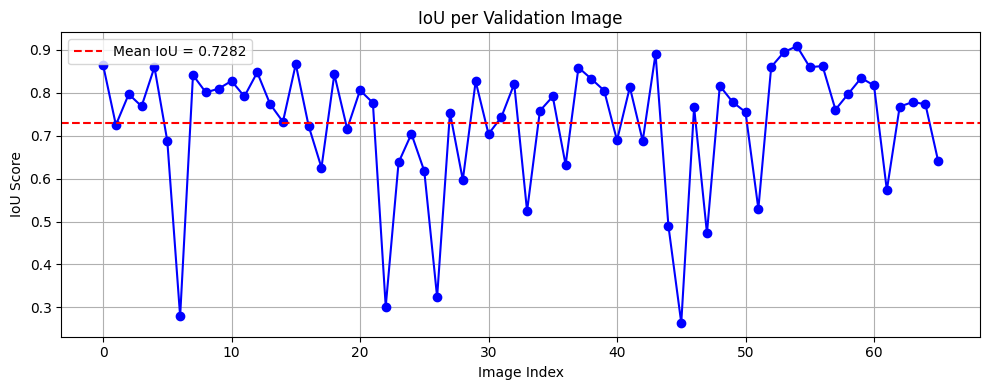

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, jaccard_score
from ultralytics import YOLO
from pathlib import Path

# Load trained model
model = YOLO("/kaggle/working/output_model/epoc4/weights/best.pt")

# Directories
images_dir = "/kaggle/working/valid/images"
labels_dir = "/kaggle/working/valid/labels"

# ---------- Helpers ----------
def yolo_txt_to_mask(txt_path, image_shape):
    h, w = image_shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    if not os.path.exists(txt_path):
        return mask
    with open(txt_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 7: continue
            polygon = list(map(float, parts[1:]))
            points = np.array(polygon).reshape(-1, 2)
            points[:, 0] *= w
            points[:, 1] *= h
            points = points.astype(np.int32)
            cv2.fillPoly(mask, [points], 1)
    return mask

def get_binary_mask(result, image_shape):
    h, w = image_shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    if result.masks is None:
        return mask
    for seg in result.masks.data:
        seg_np = seg.cpu().numpy()
        seg_resized = cv2.resize(seg_np, (w, h), interpolation=cv2.INTER_NEAREST)
        seg_binary = (seg_resized > 0.5).astype(np.uint8)
        mask = np.logical_or(mask, seg_binary).astype(np.uint8)
    return mask

def compute_iou(pred_mask, gt_mask):
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()
    if np.sum(pred_flat) == 0 and np.sum(gt_flat) == 0:
        return 1.0
    return jaccard_score(gt_flat, pred_flat, average='binary')

def evaluate_model_pixelwise(y_trues, y_preds):
    y_trues = np.concatenate(y_trues)
    y_preds = np.concatenate(y_preds)

    mse = mean_squared_error(y_trues, y_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_trues, y_preds)
    r2 = r2_score(y_trues, y_preds)

    # Handle division by zero in MAPE
    non_zero_mask = y_trues != 0
    if np.any(non_zero_mask):
        mape = np.mean(np.abs((y_trues[non_zero_mask] - y_preds[non_zero_mask]) / y_trues[non_zero_mask])) * 100
    else:
        mape = float('nan')  # or set to 0

    print(f"\n📊 Evaluation Summary:")
    print(f"Average IoU: {mean_iou:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.4f}%" if not np.isnan(mape) else "MAPE : Undefined (all y_true are zero)")

    return {'IoU': mean_iou, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}


# ---------- Main Evaluation ----------
ious = []
all_gt = []
all_pred = []

image_filenames = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

for img_filename in image_filenames:
    img_path = os.path.join(images_dir, img_filename)
    label_path = os.path.join(labels_dir, Path(img_filename).stem + ".txt")

    if not os.path.exists(label_path):
        continue

    img = cv2.imread(img_path)
    result = model(img_path, verbose=False)[0]  # Suppress internal YOLO output

    pred_mask = get_binary_mask(result, img.shape)
    gt_mask = yolo_txt_to_mask(label_path, img.shape)

    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    all_gt.append(gt_mask.flatten())
    all_pred.append(pred_mask.flatten())

# ---------- Report ----------
mean_iou = np.mean(ious)
metrics = evaluate_model_pixelwise(all_gt, all_pred)

# ---------- Plot ----------
plt.figure(figsize=(10, 4))
plt.plot(ious, marker='o', linestyle='-', color='blue')
plt.axhline(mean_iou, color='red', linestyle='--', label=f"Mean IoU = {mean_iou:.4f}")
plt.title("IoU per Validation Image")
plt.xlabel("Image Index")
plt.ylabel("IoU Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
import sys
import logging

# Suppress warnings
warnings.filterwarnings("ignore")

# Suppress logger output
logging.getLogger("ultralytics").setLevel(logging.CRITICAL)


# Paths
images_dir = "/kaggle/working/valid/images"
labels_dir = "/kaggle/working/valid/labels"
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"

# Load model
model = YOLO(model_path)

def get_pred_mask(result, shape):
    """Convert predicted segmentation masks to binary mask."""
    mask = np.zeros(shape[:2], dtype=np.uint8)
    if result.masks is not None:
        for seg in result.masks.data:
            seg_np = seg.cpu().numpy()
            seg_resized = cv2.resize(seg_np, (shape[1], shape[0]))
            mask = np.logical_or(mask, seg_resized > 0.5).astype(np.uint8)
    return mask


def label_to_mask(label_path, shape):
    h, w = shape
    mask = np.zeros((h, w), dtype=np.uint8)
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) >= 5:
                _, x_center, y_center, width, height = map(float, parts[:5])
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                mask[y1:y2, x1:x2] = 1
    return mask

# Get prediction mask from YOLO result
def get_prediction_mask(result, shape):
    h, w = shape
    mask = np.zeros((h, w), dtype=np.uint8)
    if result.masks is not None:
        for seg in result.masks.data:
            seg_np = seg.cpu().numpy()
            seg_resized = cv2.resize(seg_np, (w, h))
            mask = np.logical_or(mask, seg_resized > 0.5)
    return mask.astype(np.uint8)




def get_gt_mask(label_path, shape):
    """Generate binary mask from YOLO-format polygon or box labels."""
    h, w = shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls = int(parts[0])
            coords = list(map(float, parts[1:]))

            if len(coords) == 4:
                # YOLO box format: x_center y_center width height
                x_center, y_center, width, height = coords
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                cv2.rectangle(mask, (x1, y1), (x2, y2), 1, -1)
            else:
                # Polygon segmentation format
                points = np.array(coords).reshape(-1, 2) * [w, h]
                points = points.astype(np.int32)
                cv2.fillPoly(mask, [points], 1)
    return mask

def compute_iou(pred_mask, gt_mask):
    """Compute IoU between two binary masks."""
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return intersection / union if union != 0 else 0

def compute_dice(pred, gt):
    intersection = np.logical_and(pred, gt).sum()
    return (2 * intersection) / (pred.sum() + gt.sum()) if (pred.sum() + gt.sum()) != 0 else 1.0

def compute_pixel_accuracy(pred, gt):
    return (pred == gt).sum() / pred.size



# Store results
ious, dices, accs = [], [], []
y_true_pixels, y_pred_pixels = [], []



for filename in os.listdir(images_dir):
    if filename.endswith(('.jpg', '.png')):
        image_path = os.path.join(images_dir, filename)
        label_path = os.path.join(labels_dir, filename.replace(".jpg", ".txt").replace(".png", ".txt"))

        if not os.path.exists(label_path):
            continue

        image = cv2.imread(image_path)
        h, w, _ = image.shape

        gt_mask = label_to_mask(label_path, (h, w))
        result = model(image_path)[0]  # Suppressing print output by not printing here
        pred_mask = get_prediction_mask(result, (h, w))

        ious.append(compute_iou(pred_mask, gt_mask))
        dices.append(compute_dice(pred_mask, gt_mask))
        accs.append(compute_pixel_accuracy(pred_mask, gt_mask))

        y_true_pixels.extend(gt_mask.flatten())
        y_pred_pixels.extend(pred_mask.flatten())

# Evaluation metrics
y_true_np = np.array(y_true_pixels)
y_pred_np = np.array(y_pred_pixels)


# Iterate over validation images
for filename in os.listdir(images_dir):
    if not filename.lower().endswith((".jpg", ".png", ".jpeg")):
        continue

    image_path = os.path.join(images_dir, filename)
    label_path = os.path.join(labels_dir, os.path.splitext(filename)[0] + ".txt")

    if not os.path.exists(label_path):
        continue

    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Run inference
    result = model(image_path, verbose=False)[0]

    # Get predicted and GT masks
    pred_mask = get_pred_mask(result, img.shape)
    gt_mask = get_gt_mask(label_path, img.shape)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    # For regression metrics
    pixel_preds.append(pred_mask.flatten())
    pixel_gts.append(gt_mask.flatten())

# Combine all pixels
y_pred = np.concatenate(pixel_preds)
y_true = np.concatenate(pixel_gts)

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
nonzero_indices = y_true != 0
if np.any(nonzero_indices):
    mape = np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
else:
    mape = 0.0
avg_iou = np.mean(ious)

val_results = model.val(data="/kaggle/working/data.yaml", split="val", iou=0.5, verbose=False)

# Extract mAP metrics
map_50 = val_results.box.map50  # mAP@0.5
map_5095 = val_results.box.map  # mAP@0.5:0.95



# 📊 Print Evaluation Summary
print("\n📊 Evaluation Summary:")
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Dice Coefficient: {np.mean(dices):.4f}")
print(f"Pixel Accuracy: {np.mean(accs) * 100:.2f}%")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.4f}%")
print(f"mAP@0.5: {map_50:.4f}")
print(f"mAP@0.5:0.95: {map_5095:.4f}")

100%|██████████| 755k/755k [00:00<00:00, 25.2MB/s]
val: Scanning /kaggle/working/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]



📊 Evaluation Summary:
Average IoU: 0.5707
Average Dice Coefficient: 0.5394
Pixel Accuracy: 53.25%
MSE  : 0.2046
RMSE : 0.4524
MAE  : 13.3162
R²   : 0.1600
MAPE : 8.9030%
mAP@0.5: 0.8774
mAP@0.5:0.95: 0.6913


In [53]:
import cv2
import numpy as np

def compute_iou(mask_pred, mask_gt):
    intersection = np.logical_and(mask_pred, mask_gt)
    union = np.logical_or(mask_pred, mask_gt)
    iou_score = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou_score


In [54]:
def get_binary_mask(result, image_shape):
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    if result.masks is not None:
        for seg in result.masks.data:
            seg_np = seg.cpu().numpy()
            mask = np.logical_or(mask, seg_np).astype(np.uint8)
    return mask


In [55]:
import os
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from sklearn.metrics import jaccard_score

# Load your trained model
model_path = "/kaggle/working/output_model/epoc4/weights/best.pt"
model = YOLO(model_path)

# Directories
images_dir = "/kaggle/working/valid/images"
labels_dir = "/kaggle/working/valid/labels"

# ---------- Utility: Convert YOLO segmentation TXT to binary mask ----------
def yolo_txt_to_mask(txt_path, image_shape):
    height, width = image_shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)

    if not os.path.exists(txt_path):
        return mask

    with open(txt_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) < 7:
            continue  # Skip invalid segmentation lines

        polygon = list(map(float, parts[1:]))
        points = np.array(polygon).reshape(-1, 2)
        points[:, 0] *= width
        points[:, 1] *= height
        points = points.astype(np.int32)

        cv2.fillPoly(mask, [points], 1)  # Fill polygon on mask
    return mask

# ---------- Utility: Get binary mask from YOLOv8 prediction ----------
def get_binary_mask(result, image_shape):
    height, width = image_shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)

    if result.masks is None:
        return mask  # No detections

    for seg in result.masks.data:
        seg_np = seg.cpu().numpy()  # shape (512, 512)
        seg_resized = cv2.resize(seg_np, (width, height), interpolation=cv2.INTER_NEAREST)
        seg_binary = (seg_resized > 0.5).astype(np.uint8)
        mask = np.logical_or(mask, seg_binary).astype(np.uint8)

    return mask

# ---------- Utility: Compute IoU ----------
def compute_iou(pred_mask, gt_mask):
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()
    if np.sum(pred_flat) == 0 and np.sum(gt_flat) == 0:
        return 1.0  # Perfect match: both empty
    return jaccard_score(gt_flat, pred_flat, average='binary')

# ---------- Evaluation Loop ----------
ious = []

image_filenames = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

for img_filename in image_filenames:
    img_path = os.path.join(images_dir, img_filename)
    label_path = os.path.join(labels_dir, Path(img_filename).stem + ".txt")

    if not os.path.exists(label_path):
        print(f"No ground truth for {img_filename}, skipping...")
        continue

    # Load image and run inference
    img = cv2.imread(img_path)
    results = model(img_path)
    result = results[0]

    # Create prediction and GT masks
    pred_mask = get_binary_mask(result, img.shape)
    gt_mask = yolo_txt_to_mask(label_path, img.shape)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    print(f"{img_filename} - IoU: {iou:.4f}")

# ---------- Final Average ----------
mean_iou = np.mean(ious)
print(f"\n Average IoU across validation set: {mean_iou:.4f}")


1_png.rf.6df6a3aee11cde7d807cc09e56b3330b.jpg - IoU: 0.6320
19_png.rf.90c2c4c02033ab8834bc935b9c7aa946.jpg - IoU: 0.8167
6_png.rf.e309a6dd8e1efb550ec25964e490d351.jpg - IoU: 0.5732
12_png.rf.c58a7994fef6ac87e005ee95f1dcee54.jpg - IoU: 0.7675
4_png.rf.fd78efd846f73b6888cbd96aa33b4840.jpg - IoU: 0.6398
19_png.rf.32727553d4f4a78fcd142f259d815b83.jpg - IoU: 0.8427
2_png.rf.d9a2c1031d88d1ecdd673e37030f50ce.jpg - IoU: 0.6879
8_png.rf.e1c8215eacfe64fb4ebc3bb86318adde.jpg - IoU: 0.4730
3_png.rf.8abb31d961a9a1f9333cc24ab6dc0743.jpg - IoU: 0.6374
6_png.rf.61068a1996b77a0c66daabda14c48a8b.jpg - IoU: 0.8662
31_png.rf.07d437745081c137d8a13ed3dc91fc07.jpg - IoU: 0.8053
14_png.rf.d91d77eda8a4e38338183d709220bfc7.jpg - IoU: 0.6174
42_png.rf.b6cd6a5119374894acafeb635d8a3546.jpg - IoU: 0.8272
2_png.rf.89ae78c31e1c292eeca3c8e28a20ae4e.jpg - IoU: 0.7661
17_png.rf.f77e611bc1ead66c8c4598e1181167d6.jpg - IoU: 0.7431
50_png.rf.9fd34ad01f0c87c72a25e27741022207.jpg - IoU: 0.8618
19_png.rf.c750c348f1d8949a905eba

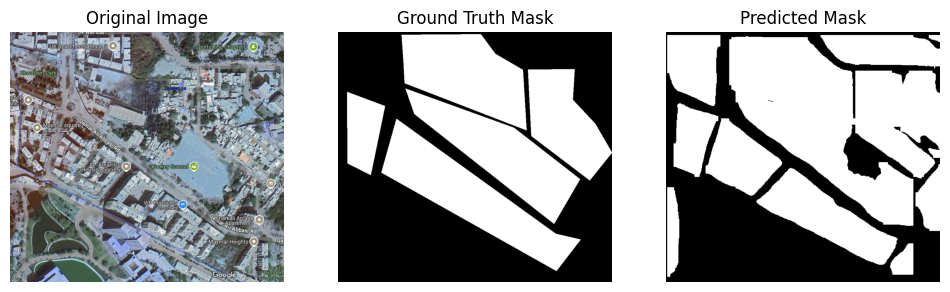

In [13]:
# Display one sample GT vs Prediction
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gt_mask, cmap='gray')
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(pred_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis("off")

plt.show()
